In [32]:
#Not everyone is always available on social media all the time. Some people limit the use of social media during festive seasons, while some avoid social media during their examinations. So, as Content creators, we need to decide when to make the most valuable piece of content and when not. That is where Instagram Reach Forecasting can help content creators and everyone who uses Instagram professionally. In this article, I will take you through the task of Instagram Reach Forecasting using Python.

In [69]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from warnings import filterwarnings
filterwarnings("ignore")
data = pd.read_csv(r"C:\Users\Mohith Kumar\Desktop\Git Hub Projects\ML Projects\Instagram Reach Forecasting using Python\Instagram-Reach.csv", encoding = 'latin-1')
print(data.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


In [71]:
data.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [73]:
data["Date"] = pd.to_datetime(data["Date"])
data["Day"] = data["Date"].dt.day_name()

In [75]:
data.isnull().sum()

Date               0
Instagram reach    0
Day                0
dtype: int64

In [77]:
data.duplicated().sum()

0

In [79]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
data["Day"] = pd.Categorical(data["Day"], categories=day_order, ordered=True)

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


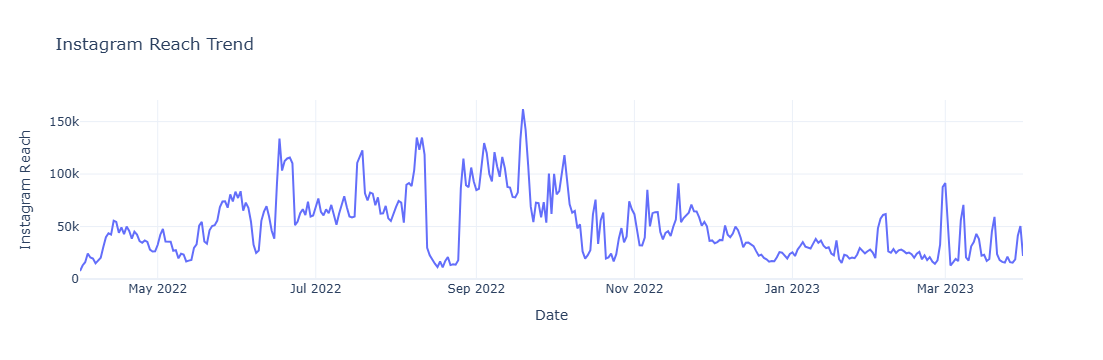

In [81]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], 
                         y=data['Instagram reach'], 
                         mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [84]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['Date'], 
                     y=data['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day', 
                  xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [85]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot', 
                  yaxis_title='Instagram Reach')
fig.show()

In [86]:
import numpy as np

day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Monday  52621.692308  46853.0  32296.071347
1    Tuesday  54030.557692  48786.0  32503.726482
2  Wednesday  51017.269231  42320.5  29047.869685
3   Thursday  48570.923077  39150.0  28623.220625
4     Friday  46666.849057  35574.0  29856.943036
5   Saturday  47374.750000  40012.0  27667.043634
6     Sunday  53114.173077  47797.0  30906.162384


In [87]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['mean'], 
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['median'], 
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['std'], 
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week', 
                  xaxis_title='Day', 
                  yaxis_title='Instagram Reach')
fig.show()

In [88]:
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = data[["Date", "Instagram reach"]]

result = seasonal_decompose(data['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

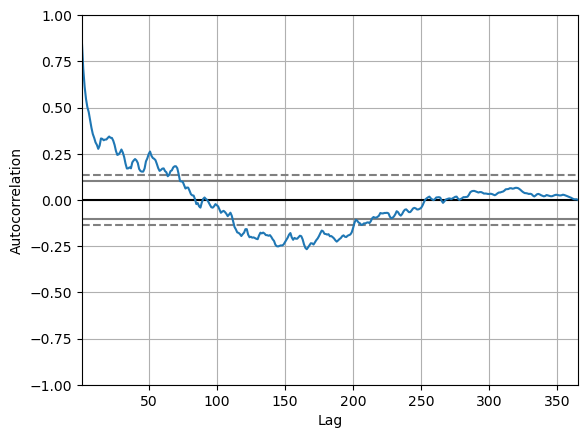

In [89]:
pd.plotting.autocorrelation_plot(data["Instagram reach"])

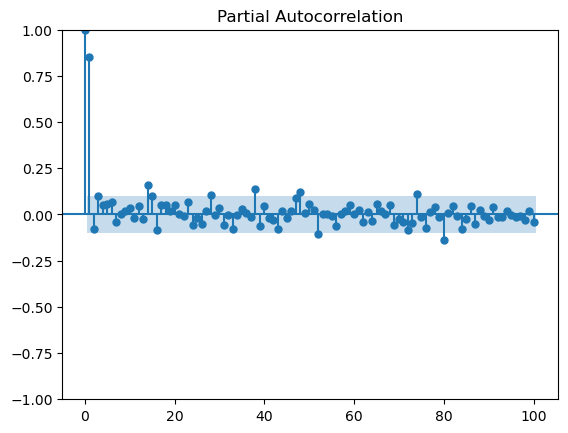

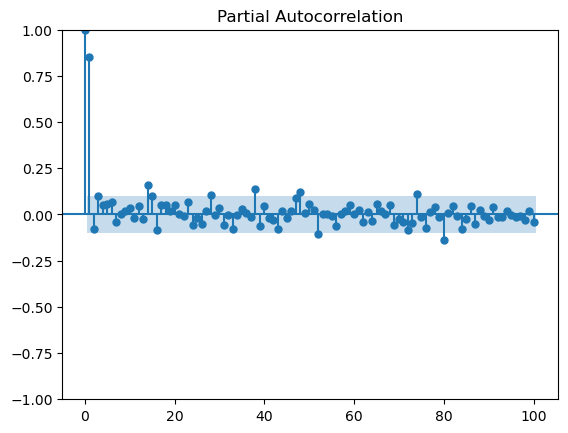

In [90]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Instagram reach"], lags = 100)

In [91]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.517
Date:                            Thu, 08 May 2025   AIC                           7919.034
Time:                                    15:01:41   BIC                           8000.170
Sample:                                         0   HQIC                          7951.322
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1899      6.421      0.030      0.976     -12.394      12.774
ar.L2          0.4729      5.967   

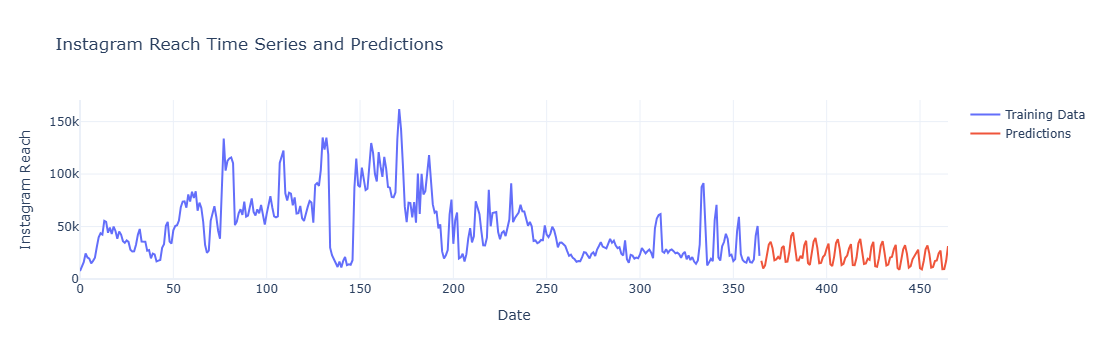

In [92]:
predictions = model.predict(len(data), len(data)+100)

trace_train = go.Scatter(x=data.index, 
                         y=data["Instagram reach"], 
                         mode="lines", 
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index, 
                        y=predictions, 
                        mode="lines", 
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions", 
                   xaxis_title="Date", 
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()

In [93]:
#stagram reach prediction is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors. I hope you liked this article on Instagram Reach Forecasting using Python. Feel free to ask valuable questions in the comments section below.